In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
import os,datetime,warnings

import tensorflow as tf
import pandas as pd
import seaborn as sns

from keras.models import Model,Sequential
from keras.layers import Dense,Conv2D,Dropout,LSTM,Input,concatenate,Activation,BatchNormalization
from keras.wrappers import scikit_learn

from sklearn import preprocessing as pp
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,KFold
from sklearn.dummy import DummyClassifier,DummyRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import confusion_matrix,auc,roc_curve
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.pipeline import Pipeline
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

import xgboost as xgb

warnings.filterwarnings('ignore')
sns.set()

C:\Users\Jan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [36]:
datapath = '..\\..\\TF_data\\STOP&FRISK\\sqf-2017.csv'

df = pd.read_csv(datapath,low_memory=False)

for colname in df.columns: 
    if 'race' in colname.lower(): print(colname)
racecol = 'SUSPECT_RACE_DESCRIPTION'

SUSPECT_RACE_DESCRIPTION


In [37]:
racedict = df[racecol].astype('category').cat.categories
df[racecol] = df[racecol].astype('category').cat.codes

print(racedict)

Index(['(null)', 'AMER IND', 'ASIAN/PAC.ISL', 'BLACK', 'BLACK HISPANIC',
       'MALE', 'WHITE', 'WHITE HISPANIC'],
      dtype='object')


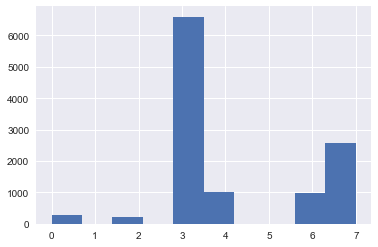

In [38]:
df[racecol].hist()
plt.show()

In [72]:
df[df['SUSPECT_ARRESTED_FLAG']=='Y'].shape

(3461, 86)